In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pollution = pd.read_csv("https://assets.datacamp.com/production/repositories/3841/datasets/a6b11493e11dd47f3e03e0b96e2a2dbc51f03cb2/pollution_wide.csv")
pollution.head()

,city,year,month,day,CO,NO2,O3,SO2
0,Cincinnati,2012,1,1,0.245,20.0,0.030,4.20
1,Cincinnati,2012,1,2,0.185,9.0,0.025,6.35
2,Cincinnati,2012,1,3,0.335,31.0,0.025,4.25
3,Cincinnati,2012,1,4,0.305,25.0,0.016,17.15
4,Cincinnati,2012,1,5,0.345,21.0,0.016,11.05


In [161]:
pollution.city.unique()

array(['Cincinnati', 'Denver', 'Des Moines', 'Fairbanks', 'Houston',
       'Indianapolis', 'Long Beach', 'Vandenberg Air Force Base'],
      dtype=object)

# scatter_kws

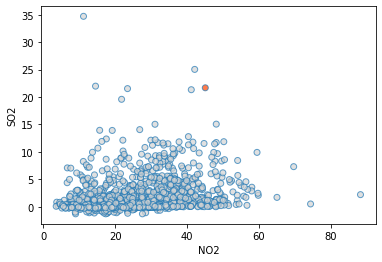

In [4]:
houston_pollution = pollution[pollution.city  ==  'Houston']

# Make array orangred for day 330 of year 2014, otherwise lightgray
houston_colors = ['orangered' if (day  ==  330) & (year  ==  2014) else 'lightgray' 
                  for day,year in zip(houston_pollution.day, houston_pollution.year)]

sns.regplot(x = 'NO2',
            y = 'SO2',
            data = houston_pollution,
            fit_reg = False, 
            # Send scatterplot argument to color points 
            scatter_kws = {'facecolors': houston_colors, 'alpha': 0.7})
plt.show()

# Programmatically creating a highlight

__use sns.scatterplot()__ instead of sns.regplot(). This is __because sns.scatterplot() can take a non-color vector as its hue argument and colors the points automatically while providing a helpful legend.__

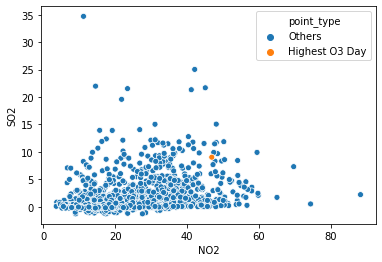

In [5]:
houston_pollution = pollution[pollution.city  ==  'Houston'].copy()

# Find the highest observed O3 value
max_O3 = houston_pollution.O3.max()

# Make a column that denotes which day had highest O3
houston_pollution['point_type'] = ['Highest O3 Day' if O3  ==  max_O3 else 'Others' for O3 in houston_pollution.O3]

# Encode the hue of the points with the O3 generated column
sns.scatterplot(x = 'NO2',
                y = 'SO2',
                hue = 'point_type',
                data = houston_pollution)
plt.show()

In [103]:
pollution[pollution.city  ==  'Denver'].O3

985     0.013
986     0.003
987     0.018
988     0.025
989     0.018
        ...  
2369    0.023
2370    0.008
2371    0.019
2372    0.014
2373    0.018
Name: O3, Length: 1389, dtype: float64

# Comparing groups


In [104]:
pollution[pollution.city  ==  'Denver'].O3

985     0.013
986     0.003
987     0.018
988     0.025
989     0.018
        ...  
2369    0.023
2370    0.008
2371    0.019
2372    0.014
2373    0.018
Name: O3, Length: 1389, dtype: float64

### rug = True

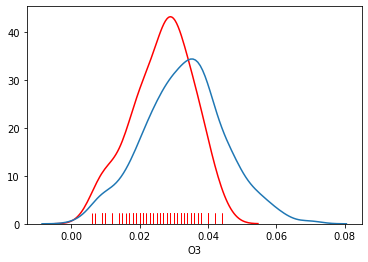

In [110]:
population_nov = pollution[pollution.month == 10]

sns.distplot(population_nov[population_nov.city =="Denver"].O3,hist = False,
            color = 'red', rug = True)

sns.distplot(population_nov[population_nov.city !="Denver"].O3,hist = False)

## kdeplot

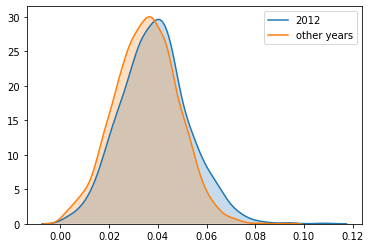

In [6]:
# Filter dataset to the year 2012
sns.kdeplot(pollution[pollution.year == 2012].O3, 
            # Shade under kde and add a helpful label
            shade = True,
            label = '2012')

# Filter dataset to everything except the year 2012
sns.kdeplot(pollution[pollution.year != 2012].O3, 
            # Again, shade under kde and add a helpful label
            shade = True,
            label = 'other years')
plt.show()

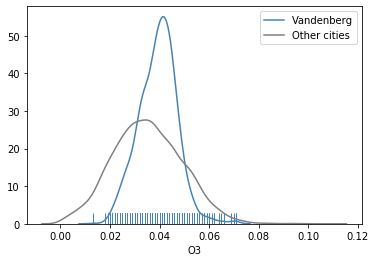

In [112]:
sns.distplot(pollution[pollution.city == 'Vandenberg Air Force Base'].O3, 
             label = 'Vandenberg', 
             # Turn of the histogram and color blue to stand out
             hist = False,
             color = 'steelblue', 
             # Turn on rugplot
             rug = True)

sns.distplot(pollution[pollution.city != 'Vandenberg Air Force Base'].O3, 
             label = 'Other cities',
             hist = False,
             
             color = 'gray')
plt.show()

## Sworm plot

### usefull for comparing multiple groups

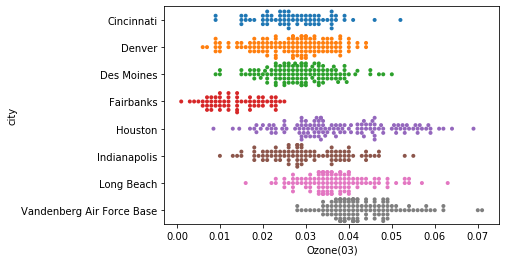

In [111]:
sns.swarmplot(y = 'city', x ='O3', data = population_nov, size = 4)
plt.xlabel('Ozone(03)')
plt.show()

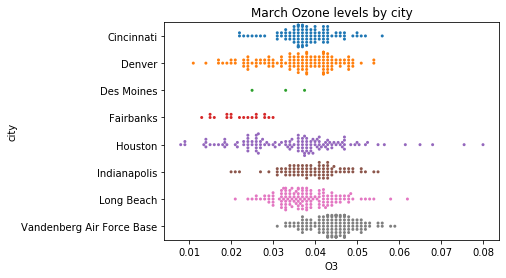

In [113]:
# Filter data to just March
pollution_mar = pollution[pollution.month == 3]

# Plot beeswarm with x as O3
sns.swarmplot(y = "city",
              x = 'O3', 
              data = pollution_mar, 
              # Decrease the size of the points to avoid crowding 
              size = 3)

# Give a descriptive title
plt.title('March Ozone levels by city')
plt.show()

# A basic text annotation

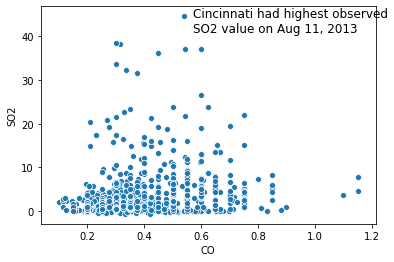

In [157]:
# Draw basic scatter plot of pollution data for August
sns.scatterplot(x = 'CO', y = 'SO2', data = pollution[pollution.month  ==  8])

# Label highest SO2 value with text annotation
plt.text(0.57, 41,
         'Cincinnati had highest observed\nSO2 value on Aug 11, 2013', 
         # Set the font to large
         fontdict = {'ha': 'left', 'size': 'large'})
plt.show()

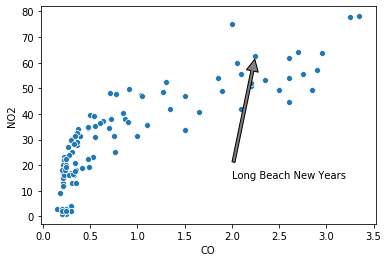

In [162]:
# Query and filter to New Years in Long Beach
jan_pollution = pollution.query("(month  ==  1) & (year  ==  2012)")
lb_newyears = jan_pollution.query("(city  ==  'Long Beach') & (day  ==  1)")

sns.scatterplot(x = 'CO', y = 'NO2',
                data = jan_pollution)

# Point arrow to lb_newyears & place text in lower left 
plt.annotate('Long Beach New Years',
             xy = (lb_newyears.CO, lb_newyears.NO2), # on 01//01/2012 at Long Beach value of CO and NO2
             xytext = (2, 15), 
             # Shrink the arrow to avoid occlusion
             arrowprops = {'facecolor':'gray', 'width': 3, 'shrink': 0.03},
             backgroundcolor = 'white')
plt.show()

# Combining annotations and color

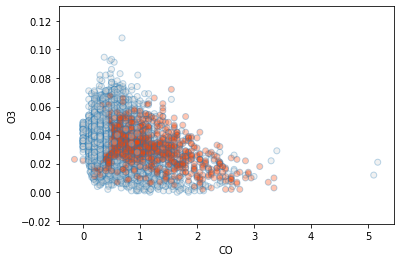

In [163]:
# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollution['city']]

# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x = 'CO',
            y = 'O3',
            data = pollution,
            fit_reg = False, 
            scatter_kws = {'facecolors':is_lb, 'alpha':0.3})
plt.show() 

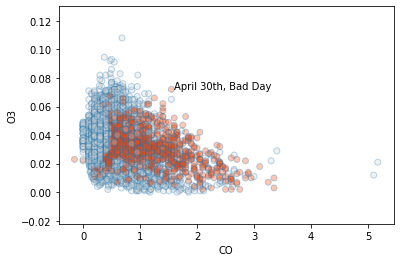

In [164]:
# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollution['city']]

# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x = 'CO',
            y = 'O3',
            data = pollution,
            fit_reg = False,
            scatter_kws = {'facecolors':is_lb, 'alpha': 0.3})

# Add annotation to plot
plt.text(1.6, 0.072, 'April 30th, Bad Day')
plt.show() 

# Getting rid of unnecessary color

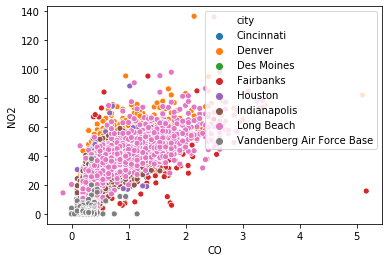

In [9]:
sns.scatterplot('CO', 'NO2',
                # alpha = 0.3,
                hue = 'city',
                data = pollution)

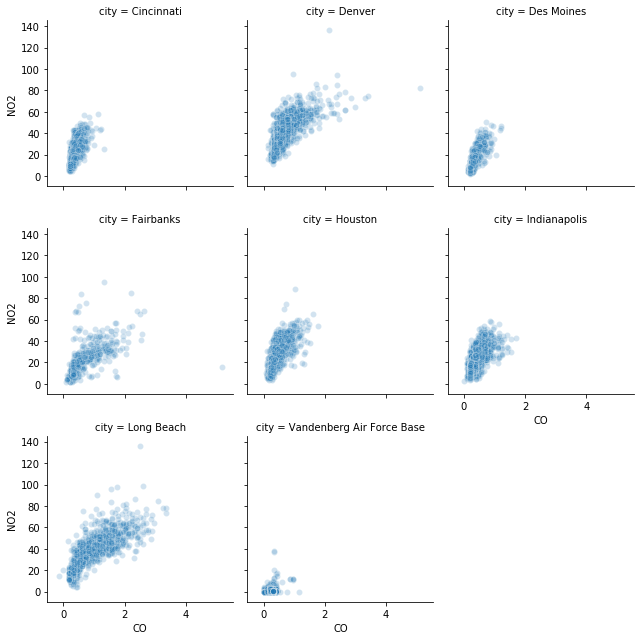

In [5]:
# Hard to read scatter of CO and NO2 w/ color mapped to city
# sns.scatterplot('CO', 'NO2',
#                 alpha = 0.2,
#                 hue = 'city',
#                 data = pollution)

# Setup a facet grid to separate the cities apart
g = sns.FacetGrid(data = pollution,
                  col = 'city',
                  col_wrap = 3) # column per row

# Map sns.scatterplot to create separate city scatter plots
g.map(sns.scatterplot,'CO', 'NO2', alpha = 0.2)
plt.show()

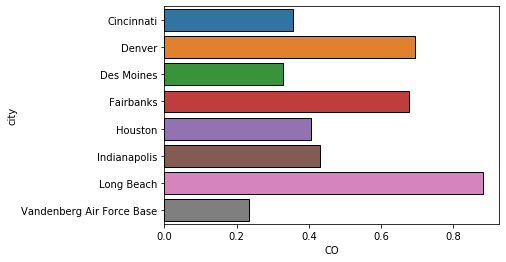

In [10]:
import numpy as np

sns.barplot(y = 'city', x = 'CO', 
              estimator = np.mean,
            ci = False,
              data = pollution,
              # Add a border to the bars
            edgecolor = 'black')
plt.show()

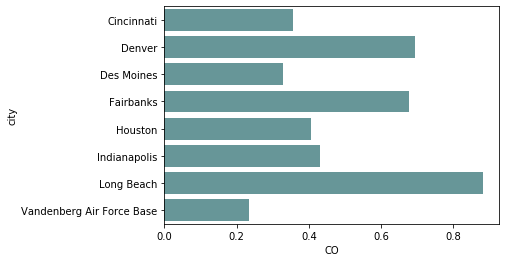

In [11]:
import numpy as np

sns.barplot(y = 'city', x = 'CO', 
              estimator = np.mean,
            ci = False,
              data = pollution,
              # Replace border with bar colors
              color = 'cadetblue')
plt.show()

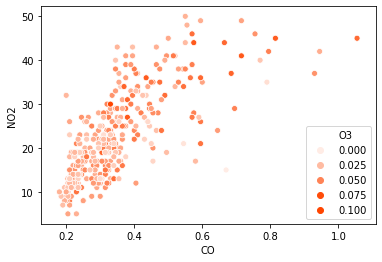

In [5]:
# Filter the data
cinci_2014 = pollution.query("city  ==  'Cincinnati' & year  ==  2014")

# Define a custom continuous color palette
color_palette = sns.light_palette('orangered',
                         as_cmap = True)

# Plot mapping the color of the points with custom palette
sns.scatterplot(x = 'CO',
                y = 'NO2',
                hue = 'O3', 
                data = cinci_2014,
                palette = color_palette)
plt.show()

# Customizing a diverging palette heatmap

In [21]:
nov_2015_CO = pollution.groupby('city')['day']
nov_2015_CO.first()

city
Cincinnati                     1
Denver                        38
Des Moines                    91
Fairbanks                    182
Houston                        1
Indianapolis                  96
Long Beach                     1
Vandenberg Air Force Base      1
Name: day, dtype: int64

In [26]:
nov_2015_CO = pollution.pivot_table('CO', index = 'city', columns ='day' )
nov_2015_CO

day,1,2,3,4,5,6,7,8,9,10,...,357,358,359,360,361,362,363,364,365,366
city,,,,,,,,,,,,,,,,,,,,,
Cincinnati,0.311833,0.249750,0.375000,0.270500,0.278250,0.264167,0.226333,0.274167,0.336333,0.475167,...,0.343167,0.392667,0.324833,0.319833,0.259667,0.293333,0.304333,0.286167,0.252667,NaN
Denver,0.683333,1.316667,1.150000,1.533333,1.583333,1.466667,1.700000,1.233333,1.500000,1.583333,...,1.112500,0.850000,0.762500,0.637500,1.250000,0.987500,0.825000,0.800000,1.066667,0.55000
Des Moines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fairbanks,NaN,NaN,NaN,NaN,NaN,1.955000,2.200000,1.730000,2.545000,1.155000,...,0.772500,1.082500,0.875000,0.807500,1.087500,1.057500,1.097500,1.220000,1.437500,NaN
Houston,0.269750,0.352563,0.497188,0.657937,0.464813,0.495437,0.616688,0.272875,0.256125,0.346375,...,0.701812,0.581438,0.573625,0.272188,0.295813,0.406250,0.478812,0.277313,0.283250,0.32375
Indianapolis,0.750000,0.200000,0.850000,0.300000,0.300000,0.150000,0.200000,0.575000,0.650000,0.875000,...,0.225000,0.425000,0.475000,0.275000,0.275000,0.250000,0.200000,0.200000,0.300000,NaN
Long Beach,2.281250,1.750000,2.012500,2.000000,1.900000,1.737500,1.850000,2.000000,2.275000,1.450000,...,1.975000,1.381250,0.887500,1.443750,1.581250,1.625000,1.456250,1.856250,1.731250,1.82500
Vandenberg Air Force Base,0.237500,0.250000,0.200000,0.212500,0.262500,0.187500,0.212500,0.212500,0.237500,0.250000,...,0.250000,0.262500,0.262500,0.250000,0.237500,0.250000,0.262500,0.275000,0.250000,0.25000


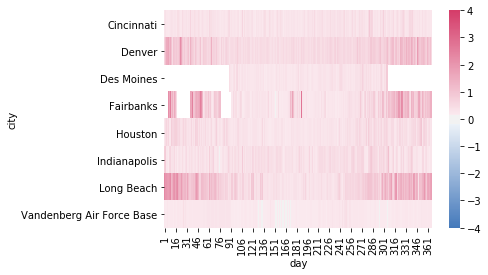

In [27]:
# Define a custom palette
color_palette = sns.diverging_palette(250, 0, as_cmap = True)

# Pass palette to plot and set axis ranges
sns.heatmap(nov_2015_CO,
            center = 0,
            cmap = color_palette,
            vmin = -4,
            vmax = 4)
plt.yticks(rotation = 0)
plt.show()

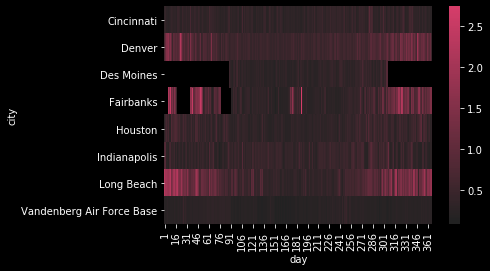

In [29]:
# Dark plot background
plt.style.use("dark_background")

# Modify palette for dark background
color_palette = sns.diverging_palette(250, 0,
                                      center = 'dark',
                                      as_cmap = True)

# Pass palette to plot and set center
sns.heatmap(nov_2015_CO,
            cmap = color_palette,
            center = 0)
plt.yticks(rotation = 0)
plt.show()

# Categorical palettes


In [33]:
pollution['interesting city'] = [x if x in ['Long Beach', 'Cinicinnati']
                                else 'other' for x in pollution['city']]

pollution['interesting city'].unique()

array(['other', 'Long Beach'], dtype=object)

In [49]:
popu = []

for x in pollution['city']:
    if x in ['Long Beach', 'Cinicinnati']:
        popu.append('x')
    else:
        popu.append("other")

In [51]:
city = ['Long Beach', 'Cinicinnati','Florida','LA']

popu = []

for x in city:
    if x in ['Long Beach', 'Cinicinnati']:
        popu.append('x')
    else:
        popu.append("other")
popu

['x', 'x', 'other', 'other']

In [37]:
num_list = [y for y in range(100) if y % 2 == 0 if y % 5 == 0]
print(num_list)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]


In [43]:
l = []
for i in range(100):
    if i % 2 ==0:
        if i% 5 ==0:
            l.append(i)
l

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

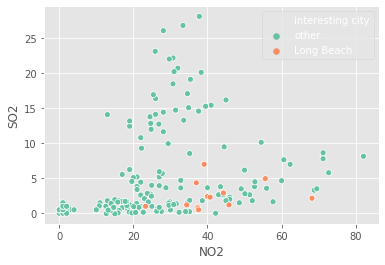

In [54]:
plt.style.use("ggplot")

pollution['interesting city'] = [x if x in ['Long Beach', 'Cinicinnati']
                                else 'other' for x in pollution['city']]


sns.scatterplot(x = 'NO2', y = 'SO2', hue = 'interesting city',
                palette = "Set2", data = pollution.query('year ==2014 & month ==12'))

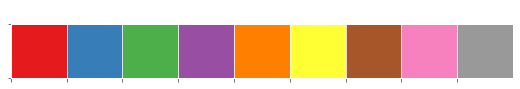

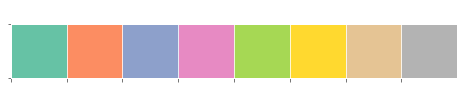

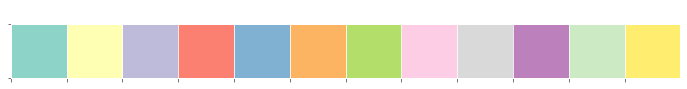

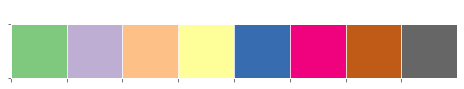

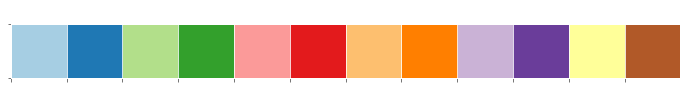

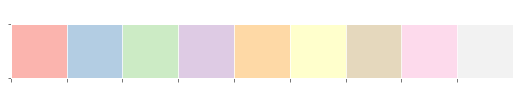

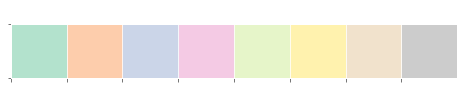

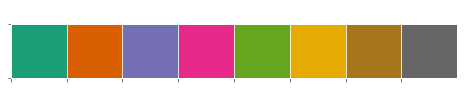

In [64]:
colorbrewer_palettes = ['Set1',"Set2", 'Set3', 'Accent',
                      'Paired', 'Pastel1','Pastel2','Dark2']

for pal in colorbrewer_palettes:
    sns.palplot(pal  = sns.color_palette(pal))
    plt.title(pal, loc = 'left')

In [65]:
sns.color_palette('Set1')

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

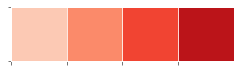

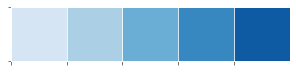

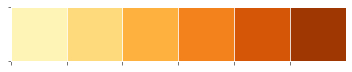

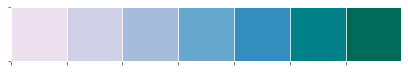

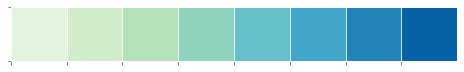

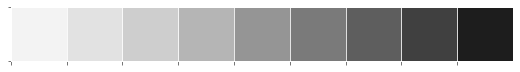

In [70]:
colorbrewer_palettes = ['Reds', 'Blues', 'YlOrBr', 'PuBuGn',
                        'GnBu', 'Greys']

for i, pal in enumerate(colorbrewer_palettes):
    sns.palplot(pal=sns.color_palette(pal, n_colors=i+4))

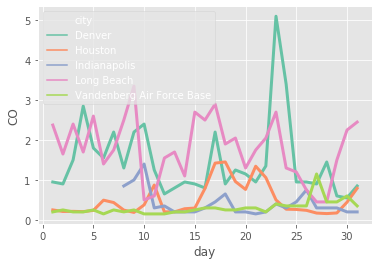

In [74]:
# Filter our data to Jan 2013
pollution_jan13 = pollution.query('year  ==  2013 & month  ==  1')

# Color lines by the city and use custom ColorBrewer palette
sns.lineplot(x = "day", 
             y = "CO", 
             hue = "city",
             palette = "Set2", 
             linewidth = 3,
             data = pollution_jan13)
plt.show()

In [80]:
# Choose the combos that get distinct colors
wanted_combos = ['Vandenberg Air Force Base NO2', 'Long Beach CO', 'Cincinnati SO2']

# Assign a new column to DataFrame for isolating the desired combos
pollution['color_cats'] = [x if x in wanted_combos else 'other' for x in pollution['city']]

# Plot lines with color driven by new column and lines driven by original categories
sns.lineplot(x = "month",
             y = "value",
             hue = 'color_cats',
             units = 'city',
             estimator = None,
             palette = 'Set2',
             data = pollution)
plt.show()

ValueError: Could not interpret input 'value'

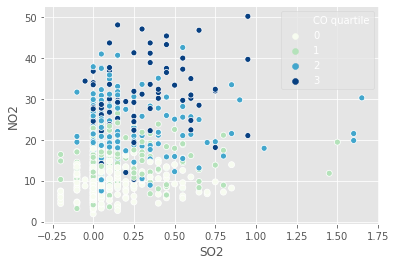

In [81]:
# Divide CO into quartiles
pollution['CO quartile'] = pd.qcut(pollution['CO'], q = 4, labels = False)

# Filter to just Des Moines
des_moines = pollution.query("city  ==  'Des Moines'")

# Color points with by quartile and use ColorBrewer palette
sns.scatterplot(x = 'SO2',
                y = 'NO2',
                hue = 'CO quartile', 
                data = des_moines,
                palette = 'GnBu')
plt.show()

In [83]:
# Reduce to just cities in the western half of US
cities = ['Fairbanks', 'Long Beach', 'Vandenberg Air Force Base', 'Denver', 
            ]

# Filter data to desired cities
city_maxes = pollution[pollution.city.isin(cities)]

# Swap city and year encodings
sns.catplot(x = 'city', hue = 'year',
              y = 'value', row = 'pollutant',    
              # Change palette to one appropriate for ordinal categories
              data = city_maxes, palette = 'BuGn',
              sharey = False, kind = 'bar')
plt.show()

ValueError: Could not interpret input 'value'

In [72]:
x = isinstance("Hello", (float, int, str, list, dict, tuple))
x

True

In [73]:
numbers = [1, 2, 3]

result = isinstance(numbers, list)
print(numbers,'instance of list?', result)

result = isinstance(numbers, dict)
print(numbers,'instance of dict?', result)

result = isinstance(numbers, (dict, list))
print(numbers,'instance of dict or list?', result)

[1, 2, 3] instance of list? True
[1, 2, 3] instance of dict? False
[1, 2, 3] instance of dict or list? True


In [122]:
[s.upper() for s in ['hello', 'world']]


['HELLO', 'WORLD']

In [38]:
g = lambda x,y: x + y

g(2,3)

5

In [15]:
dict_gen = {num: num * 2 for num in range(5)}

dict_gen

{0: 0, 1: 2, 2: 4, 3: 6, 4: 8}

In [20]:
def add_many(*args):
    s = 0
    for n in args:
        s += n
    print(s)

add_many(100, 50, 3)

153


In [39]:
class Dog:    
    def woof(self):
        return 'woof!'

t = Dog()
t.woof()

'woof!'

In [30]:
w = 'python'

w_iterator = iter(w)

next(w_iterator)

'p'

In [31]:
class Building:
    
    def __init__(self, number):
        self.number = number

b = Building(245)

b.number

245

In [34]:
fruits = {
    'apple': 1,
    'banana': 2,
    'coconut': 3
}
for i in fruits.values():
    print(i)

1
2
3


In [36]:
x = (1, 2, 3)
s = dict(x)

s

TypeError: cannot convert dictionary update sequence element #0 to a sequence

In [70]:
import numpy as np
import pandas as pd

data = pd.Series(['apple','banana','apple', 'banana'])
data.str.upper()

0     APPLE
1    BANANA
2     APPLE
3    BANANA
dtype: object

In [73]:
import re
data=['apple','banana','apple', 'banana']
data.re.search('ap')


AttributeError: 'list' object has no attribute 're'

In [41]:
string = 'GEEKSFORGEEKS'
print(string.lower()) 

geeksforgeeks


In [84]:
from datetime import date

d = date(2020, 2, 10)
d.strftime('%Y-%m-%d')

'2020-02-10'

In [54]:
import pandas as pd, numpy as np

In [49]:
import datetime

In [64]:
df1 = pd.DataFrame({"id" :[0,1,2,3],
                    'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({"id" :[0,1,2,3],
                    'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})

pd.merge(df1, df2, on = "id")


,id,lkey,value_x,rkey,value_y
0,0,foo,1,foo,5
1,1,bar,2,bar,6
2,2,baz,3,baz,7
3,3,foo,5,foo,8


In [76]:
data = pd.Series([1, 2, np.nan, 4, 5])
data[data.notnull()]

0    1.0
1    2.0
3    4.0
4    5.0
dtype: float64

In [81]:
from datetime import timedelta 
from datetime import datetime

start = datetime(2011, 1, 7)
start

datetime.datetime(2011, 1, 7, 0, 0)

In [82]:
stamp = datetime(2011, 1, 3)
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [126]:
import datetime as dt

start = dt(2010, 10, 5, 13, 30, 2)
delta = dt(seconds = 2)

print(start + delta)

TypeError: 'module' object is not callable

In [148]:
df = pd.DataFrame({"A":['a', 'b','c', 'd', 'e'],  
                   "B":[7, 2, 54, 3, None],  
                   "C":[20, 16, 11, 3, 8],  
                   "D":[14, 3, None, 2, 6]})  
df.set_index("A")

,B,C,D
A,,,
a,7.0,20,14.0
b,2.0,16,3.0
c,54.0,11,NaN
d,3.0,3,2.0
e,NaN,8,6.0


In [149]:
result = df.loc['A',"B"] 
  
# Print the result 
print(result) 

KeyError: 'A'

In [145]:
df = pd.DataFrame({'Weight':[45, 88, 56, 15, 71], 
                   'Name':['Sam', 'Andrea', 'Alex', 'Robin', 'Kia'], 
                   'Age':[14, 25, 55, 8, 21]}) 
  
# Create the index 
index_ = ['Row_1', 'Row_2', 'Row_3', 'Row_4', 'Row_5'] 
  
# Set the index 
df.index = index_ 
  
# Print the DataFrame 
print(df)

       Weight    Name  Age
Row_1      45     Sam   14
Row_2      88  Andrea   25
Row_3      56    Alex   55
Row_4      15   Robin    8
Row_5      71     Kia   21


In [146]:
result = df.loc['Row_2', 'Name'] 
  
# Print the result 
print(result) 

Andrea


In [150]:
df = pd.DataFrame({
                   "B":[7, 2, 54, 3, None],  
                   "C":[20, 16, 11, 3, 8],  
                   "D":[14, 3, None, 2, 6]})  
index= ['a', 'b','c', 'd', 'e']
df.index = index
print(df)

      B   C     D
a   7.0  20  14.0
b   2.0  16   3.0
c  54.0  11   NaN
d   3.0   3   2.0
e   NaN   8   6.0


In [151]:
result = df.loc['d', 'B'] 
  
# Print the result 
print(result) 

3.0


In [156]:
df.lambda x: x(np.sqrt)

SyntaxError: invalid syntax (<ipython-input-156-b43ba0188a0c>, line 1)